In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utilsCM

from tqdm import tqdm

In [2]:
#Load word2sense
#already preprocessed in MATLAB so that Wrd2Sns and THINGs overlap --> we have IMAGES, LABELS and SENSES
pathtofile = '../code-00-preprocessdataset/'
Y_embeddings = pd.read_csv(pathtofile + "ThingsWrd2Sns.txt", sep=",")
Y_embeddings = Y_embeddings.values[:,1:Y_embeddings.shape[1]-1].astype(np.float)

In [3]:
# keyword = {'ROIpred'}


# layer =  {'conv_1', 'conv_2','conv_3','conv_4','conv_5'}
layer =  {'conv_1','conv_5','fc_3'}

Sub = [1,2,3,4]


pretrained_val = True

datapath = '../../../data-00/'
savepath = '../../../data-01/'

In [4]:
#make object selective ROIs by adding together LOC and PFS
objectROI = {'LOC','PFS'}
for ilayer in layer:
    predictor_variable = {}
    for iSub in Sub:        
            
        if not pretrained_val:
            filename = datapath +  "ROIpred_Sub" + str(iSub) + '_ObjectROI_' + ilayer + '_untrained.npy'
        else:
            filename = datapath +  "ROIpred_Sub" + str(iSub) + '_ObjectROI_' + ilayer + '.npy'

        if not os.path.isfile(filename): #if it's already saves
            for iROI in objectROI:
                if not pretrained_val:
                    thisSub = np.load(datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer + '_untrained.npy')
                else:
                    thisSub = np.load(datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer + '.npy')
            
                #load ROIpred as predictor variable
                if iSub is 1:
                    predictor_variable = thisSub
                else:
                    predictor_variable = np.append( predictor_variable , thisSub, axis = 1)    
            np.save(filename,predictor_variable)
  

In [10]:
ROI = {'EVC','ObjectROI'}
# ROI = {'EVC'}
keyword = {'DNNActvtn','ROIpred'}
# keyword = {'ROIpred'}
Keepncomps = list(range(2,42,2))
# Keepncomps = [2]
pretrained_val = True


for ikeyword in keyword:
    for ilayer in layer:
        
        if ikeyword is 'ROIpred':
            
            for iROI in ROI: 
                predictor_variable = {}
                for iSub in Sub:
                    if not pretrained_val:
                        thisSub = np.load(datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer + '_untrained.npy')
                    else:
                        thisSub = np.load(datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer + '.npy')
                            
                    #load ROIpred as predictor variable
                    if iSub is 1:
                        predictor_variable = thisSub
                    else:
                        predictor_variable = np.append( predictor_variable , thisSub, axis = 1)

                for icomps in Keepncomps:
                    if pretrained_val:
                        filename = 'PredictSENSES_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                    else:
                        filename = 'PredictSENSES_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                    if not os.path.isfile(savepath + filename + '.npy'):
                        mean_r = utilsCM.iter_cvregress(predictor_variable,Y_embeddings,ikeyword,ilayer,icomps,iROI,savefolder = savepath, pretrained = pretrained_val)
#                     utilsCM.make_figure(mean_r,ikeyword,ilayer,icomps,iROI, figurepath = 'figures-01/')
#                     print(mean_r)
        
        
        elif ikeyword is 'DNNActvtn':            
            if not pretrained_val:
                predictor_variable = pd.read_csv(datapath +  "things_" + ilayer + '_untrained.csv', header=None, index_col=0).iloc[:,:].to_numpy()
            else:
                predictor_variable = pd.read_csv(datapath +  "things_" + ilayer + '.csv', header=None, index_col=0).iloc[:,:].to_numpy()

                
            for icomps in Keepncomps:
                if pretrained_val:
                    filename = 'PredictSENSES_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                else:
                    filename = 'PredictSENSES_' + ikeyword +  '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                    
                if not os.path.isfile(savepath + filename + '.npy'):
                    mean_r = utilsCM.iter_cvregress(predictor_variable,Y_embeddings,ikeyword,ilayer,icomps,savefolder = savepath, pretrained = pretrained_val)
                
#                 utilsCM.make_figure(mean_r,ikeyword,ilayer,icomps, figurepath = 'figures-01/')

k-fold regression, independet variable: 2 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 4 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 6 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 8 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 10 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 12 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 14 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 16 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 18 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 20 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 22 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 24 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 26 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 28 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 30 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 32 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 34 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 36 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 38 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 40 PCs retained of DNNActvtn from conv_5


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 2 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 4 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 6 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 8 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 10 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 12 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 14 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 16 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 18 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 20 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 22 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 24 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 26 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 28 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 30 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 32 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 34 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 36 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 38 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 40 PCs retained of ROIpred from EVC


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 2 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 4 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 6 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 8 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 10 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 12 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 14 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 16 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 18 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 20 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 22 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 24 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 26 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 28 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 30 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 32 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 34 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 36 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 38 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


k-fold regression, independet variable: 40 PCs retained of ROIpred from ObjectROI


/Users/cmagri1/OneDrive - Johns Hopkins/Project-Word2Sense/Code-Python/semantic-code/cm/code-01-analysis/utilsCM.py:172: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rs, axis=0) #TO handle Nans, since the feature space is so sparse


In [11]:
tresh_bonf = utilsCM.p2r(.05/Y_embeddings.shape[1], 1470)
figurepath='../../../figures-02/'

ROI = {'EVC','ObjectROI'}
keyword = {'DNNActvtn','ROIpred'}
Keepncomps = list(range(2,42,2))
pretrained_val = True


In [13]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

layer = {'conv_5'}
pretrained_vec = [True, False]
##Showing histograms for senses above threshold

myDict_count = {}
myDict_mean = {}
myDict_max = {}
myDict_median = {}


for ilayer in layer:
    for pretrained_val in pretrained_vec:
        for ikeyword in keyword:            
            for icomps in Keepncomps:
                thisPrediction = []
                if ikeyword is 'DNNActvtn':
#                     count += 1
                    if not pretrained_val:
#                         count += 1
                        filename = 'PredictSENSES_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                        DictKey = ikeyword + '_untrained'
                    else:
                        filename = 'PredictSENSES_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                        DictKey = ikeyword
                    if DictKey not in myDict_count:
                        myDict_count[DictKey] = []
                        myDict_mean[DictKey] = []
                        myDict_max[DictKey] = []
                        myDict_median[DictKey] = []
                        
                    thisPrediction = np.load('../../../data-01/' + filename + '.npy')
                    pred_thresh = thisPrediction[thisPrediction>tresh_bonf]
                    myDict_count[DictKey].append(pred_thresh.shape[0])
                    myDict_mean[DictKey].append(pred_thresh.mean())
                    myDict_max[DictKey].append(pred_thresh.max())
                    myDict_median[DictKey].append(np.median(pred_thresh))
#                     utilsCM.make_figure(pred_thresh,ikeyword,ilayer,icomps,figure_size=(50,20),figure_path = figurepath,font_size=40,pretrained = pretrained_val)
                    
            
                elif ikeyword is 'ROIpred':
                
                    for iROI in ROI:
                        if not pretrained_val:
                            filename = 'PredictSENSES_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                            DictKey = iROI + '_untrained'
                            
                        else:
                            filename = 'PredictSENSES_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                            DictKey = iROI
                        if DictKey not in myDict_count:
                            myDict_count[DictKey] = []
                            myDict_mean[DictKey] = []
                            myDict_max[DictKey] = []
                            myDict_median[DictKey] = []
                        
                        thisPrediction = np.load(savepath + filename + '.npy')
                        pred_thresh = thisPrediction[thisPrediction>tresh_bonf]
                        myDict_count[DictKey].append(pred_thresh.shape[0])
                        myDict_mean[DictKey].append(pred_thresh.mean())
                        myDict_max[DictKey].append(pred_thresh.max())
                        myDict_median[DictKey].append(np.median(pred_thresh))
                        utilsCM.make_figure(pred_thresh,ikeyword,ilayer,icomps,iROI,figure_size=(50,20),figure_path = figurepath,font_size=40,pretrained = pretrained_val)
                        
                        
        
    myDict_count['PCs'] = []
    myDict_mean['PCs'] = []
    myDict_max['PCs'] = []
    myDict_median['PCs'] = []
    myDict_count['Metric'] = []
    myDict_mean['Metric'] = []
    myDict_max['Metric'] = []
    myDict_median['Metric'] = []
    for i in range(2,42,2):
        myDict_count['PCs'].append(i)
        myDict_mean['PCs'].append(i)
        myDict_max['PCs'].append(i)
        myDict_median['PCs'].append(i)
        myDict_count['Metric'].append('count')
        myDict_mean['Metric'].append('mean')
        myDict_max['Metric'].append('max')
        myDict_median['Metric'].append('median')
        
    

In [14]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [15]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

,DNNActvtn,ObjectROI,EVC,DNNActvtn_untrained,ObjectROI_untrained,EVC_untrained
PCs,,,,,,
2,0.155844,0.142247,0.142427,0.138518,0.149616,0.127214
4,0.163130,0.150557,0.146791,0.150300,0.150159,0.148333
6,0.168115,0.150953,0.157813,0.154781,0.151739,0.152388
8,0.171827,0.159053,0.157849,0.157760,0.155277,0.156782
10,0.175901,0.162569,0.163216,0.159066,0.154708,0.154611
12,0.179351,0.165828,0.168467,0.160457,0.156779,0.156248
14,0.177999,0.168922,0.168274,0.161600,0.159258,0.156137
16,0.183125,0.169847,0.170498,0.162072,0.161062,0.155166
18,0.183699,0.175108,0.171406,0.162522,0.161435,0.155796


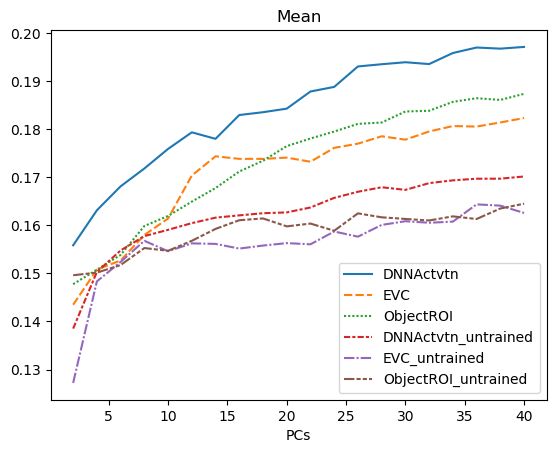

In [16]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:6]).set_title('Mean')
plt.savefig(figurepath + "Mean.png")


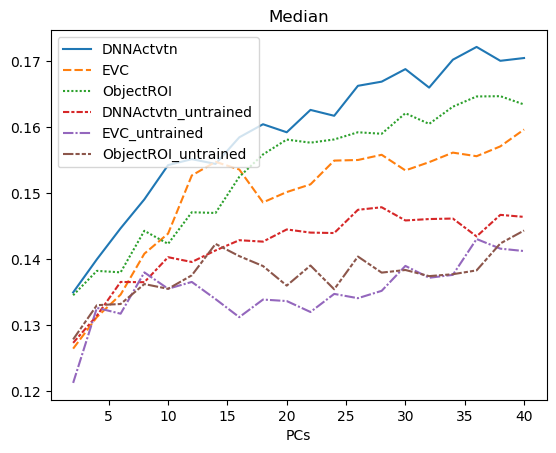

In [17]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'median'].iloc[:,0:6]).set_title('Median')
plt.savefig(figurepath + "Median.png")

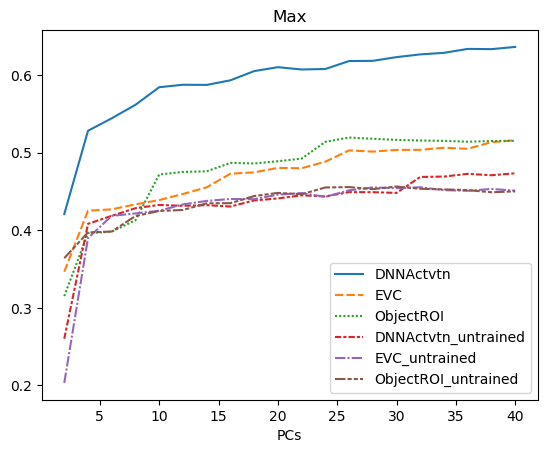

In [18]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:6]).set_title('Max')
plt.savefig(figurepath + "Max.png")

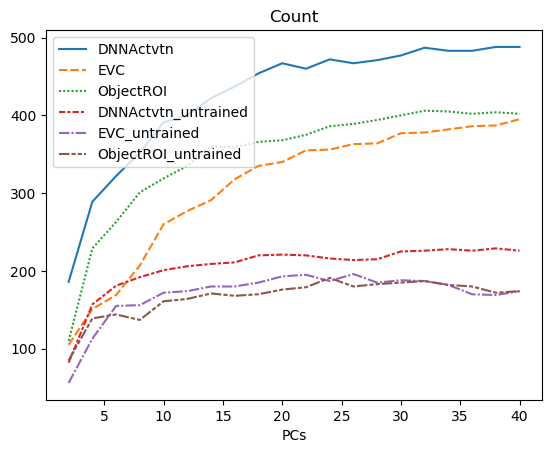

In [19]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:6]).set_title('Count')
plt.savefig(figurepath + "Count.png")

In [20]:
myDict.items()

NameError: name 'myDict' is not defined

In [125]:
len(list(range(2,42,2)))

20

In [ ]:
filename_PPA = 'PredictSENSES_' + 'ROIpred' + '_'+ 'PPA'+'_'+ ilayer+ '_'+ str(icomps) +'PCs'
thisPrediction_PPA = np.load(savepath + filename_PPA + '.npy')

filename_EVC = 'PredictSENSES_' + 'ROIpred' + '_'+ 'EVC'+'_'+ ilayer + '_'+ str(icomps) +'PCs'
thisPrediction_EVC = np.load( savepath + filename_EVC + '.npy')

filename_LOC = 'PredictSENSES_' + 'ROIpred' + '_'+ 'LOC'+'_'+ ilayer + '_'+ str(icomps) +'PCs'
thisPrediction_LOC = np.load(savepath + filename_LOC + '.npy')

# filename_DNN = 'PredictSENSES_' + 'DNNActvtn' +'_'+ ilayer + '_'+ str(icomps) +'PCs'
# thisPrediction_DNN = np.load('../../../data-01/' + filename_DNN + '.npy')

In [ ]:
thisPrediction_PPA

In [ ]:
thisPrediction_EVC

In [ ]:
thisPrediction_LOC